In [1]:
import torch
import numpy as np
import wandb

import os
if os.path.split(os.getcwd())[-1] != 'src':
    os.chdir('../src')
    
import matplotlib.pyplot as plt
from collections import defaultdict

import networkx as nx
import cdt
cdt.SETTINGS.rpath = '/usr/local/bin/Rscript' # for macOS

import data_generation.causal_graphs.graph_generation as graph_gen
import data_generation.causal_graphs.graph_visualization as visual
import data_generation.data_generation as data_gen
import models.multivar_mlp as mmlp
import causal_discovery.prepare_data as cd
import outlier_detection.model_based as ood

from platform import python_version
assert python_version() == '3.10.4'

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


## DAG generation (chain)

In [3]:
equations = defaultdict(dict)
equations['A']['input_names'] = []
equations['A']['mu_fn'] = lambda inputs : 0
equations['A']['sigma_fn'] = lambda inputs : 0.5 

equations['B']['input_names'] = ['A']
equations['B']['mu_fn'] = lambda inputs : inputs['A']
equations['B']['sigma_fn'] = lambda inputs : 0.5

equations['C']['input_names'] = ['B']
equations['C']['mu_fn'] = lambda inputs : inputs['B']
equations['C']['sigma_fn'] = lambda inputs : 0.5

equations['D']['input_names'] = ['C']
equations['D']['mu_fn'] = lambda inputs : inputs['C']
equations['D']['sigma_fn'] = lambda inputs : 0.5

equations['E']['input_names'] = ['D']
equations['E']['mu_fn'] = lambda inputs : inputs['D']
equations['E']['sigma_fn'] = lambda inputs : 0.5      

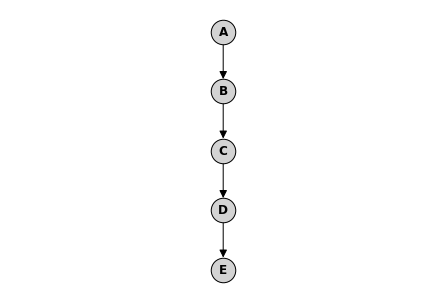

In [4]:
dag = graph_gen.generate_graph_from_equations(equations) 
visual.visualize_graph(dag, show_plot=True)

## Hparams

In [16]:
N_OBS = 10000
INT_RATIO = 0.01
BATCH_SIZE = 128

lr = 5e-4
loss = mmlp.nll
epochs = 5
fit_epochs = 40
stds = 4
seeds = list(range(50))
variables = list(equations.keys())
NUM_VARS = len(variables)
true_target_indices = np.cumsum([N_OBS] + [INT_RATIO * N_OBS] * NUM_VARS)
alpha_skeleton = 0.0000000000001
alpha = 0.0000000000001

In [17]:
# wandb config for logging
config = dict(
    n_obs = N_OBS,
    int_ratio = INT_RATIO,
    batch_size = BATCH_SIZE,
    lr = lr,
    epochs = epochs,
    fit_epochs = fit_epochs,
    threshold = f'{stds} stds',
    num_vars = NUM_VARS,
    graph_structure = 'chain'
    )

## Experiments
Causal discovery from detected interventions on different dataset samples from the above chain DAG

Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


SHD,2


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


SHD,3


Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None
PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


SHD,1


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


Creating model...


  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/nadjarutsch/uncategorized/f6kvsak9/file_stream
NoneType: None


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/idiod10/lib/python3.10/site-packages/wandb/apis/normalize.py", line 24, in wrapper
    return func(*args, **kwargs)
  File "/opt/anaconda3/envs/idiod10/lib/python3.10/site-packages/wandb/sdk/internal/internal_api.py", line 1425, in upload_urls
    run = query_result["model"]["bucket"]
TypeError: 'NoneType' object is not subscriptable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/idiod10/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/envs/idiod10/lib/python3.10/site-packages/wandb/filesync/upload_job.py", line 56, in run
    success = self.push()
  File "/opt/anaconda3/envs/idiod10/lib/python3.10/site-packages/wandb/filesync/upload_job.py", line 112, in push
    _, upload_headers, result = self._api.upload_urls(project, [self.save_name])
  File "/opt/anacond

KeyboardInterrupt: 

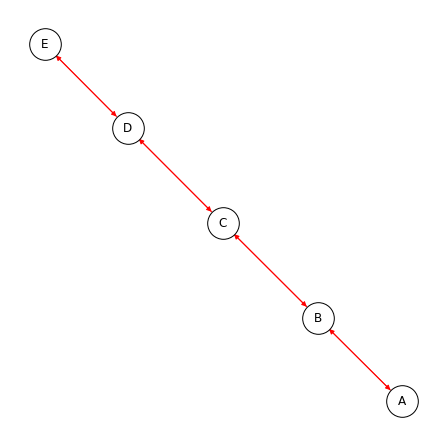

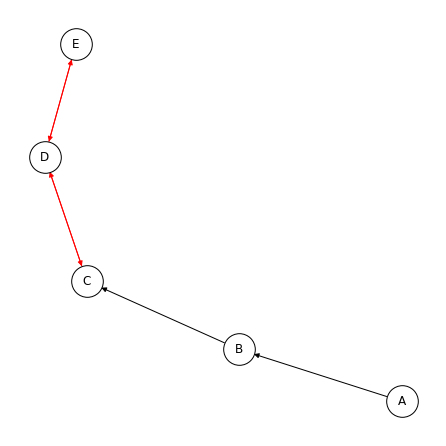

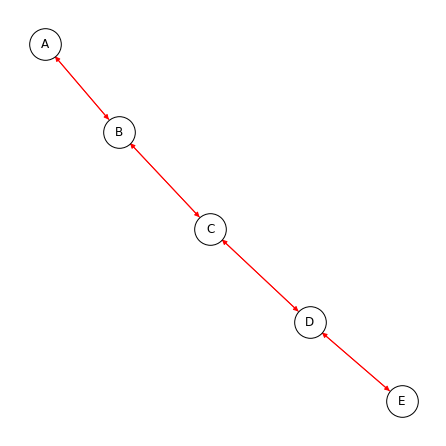

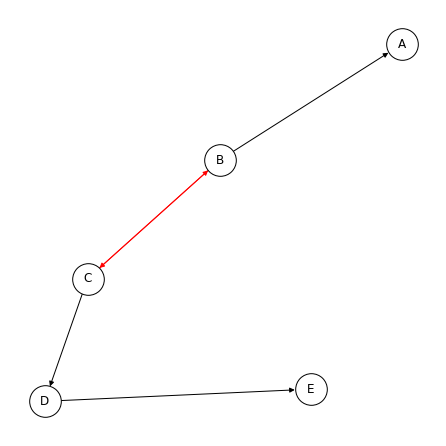

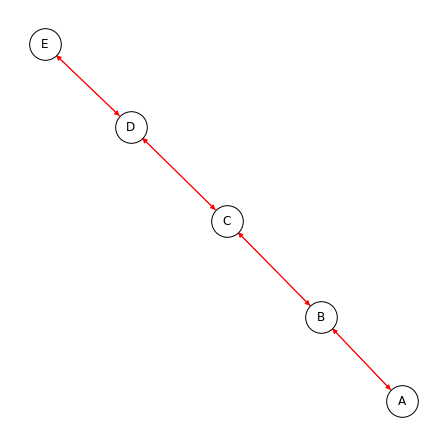

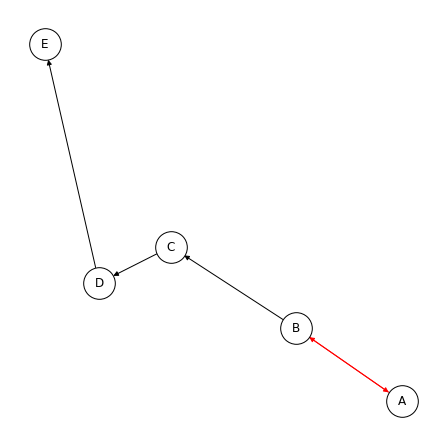

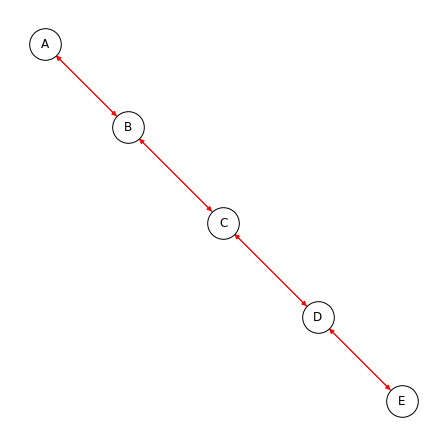

In [18]:
true_graph = nx.DiGraph()
true_graph.add_nodes_from(variables)
true_graph.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')])

performance = {}

for seed in seeds:
    config['seed'] = seed
    run = wandb.init(project="idiod", entity="nadjarutsch", note='code setup', group='prototype', tags=['chain', 'model-based', 'known intervention targets'], config=config, reinit=True)
    with run:
        # generate data
        synth_dataset = data_gen.generate_data(dag=dag, n_obs=N_OBS, int_ratio=INT_RATIO, seed=seed)

        # initial causal discovery (skeleton)
        df = cd.prepare_data(cd="pc", data=synth_dataset, variables=variables)
        
        # logging
        tbl = wandb.Table(dataframe=df)
        wandb.log({"initial mixed data": tbl})
        
        model_pc = cdt.causality.graph.PC(alpha=alpha_skeleton)    
        skeleton = model_pc.predict(df)
        
        plt.figure(figsize=(6,6))
        colors = visual.get_colors(skeleton)
        nx.draw(skeleton, with_labels=True, node_size=1000, node_color='w', edgecolors ='black', edge_color=colors)
        wandb.log({"skeleton": wandb.Image(plt)})
        
        adj_matrix = torch.from_numpy(nx.to_numpy_array(skeleton))

        # intervention detection (ood)
        print('Creating model...')
        gnmodel = mmlp.GaussianNoiseModel(num_vars=dag.num_vars, hidden_dims=[])
        optimizer = torch.optim.Adam(gnmodel.parameters(), lr=lr)
        ood.cluster(synth_dataset, gnmodel, loss, optimizer, epochs, fit_epochs, adj_matrix, stds, BATCH_SIZE)

        synth_dataset.set_true_intervention_targets(true_target_indices)
        df = cd.prepare_data(cd="pc", data=synth_dataset, variables=variables)
        
        # logging
        tbl = wandb.Table(dataframe=df)
        wandb.log({"clustered data": tbl})

        for node in list(df.columns.values[dag.num_vars:]):
            skeleton.add_node(node)
            skeleton.add_edge(node, node.replace("I_",""))

        model_pc = cdt.causality.graph.PC(CItest="gaussian", alpha=alpha)
        created_graph = model_pc.predict(df, skeleton)
        created_graph.remove_nodes_from(list(df.columns.values[dag.num_vars:]))

        shd = cdt.metrics.SHD(true_graph, created_graph)
        wandb.run.summary["SHD"] = shd

        plt.figure(figsize=(6,6))
        colors = visual.get_colors(created_graph)
        nx.draw(created_graph, with_labels=True, node_size=1000, node_color='w', edgecolors ='black', edge_color=colors)
        wandb.log({"discovered graph": wandb.Image(plt)})
        
        
        